# Assignment-8

### In this assignment students have to transform iris data into 3 dimensions and plot a 3d chart with transformed dimensions and colour each data point with specific class.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets

In [2]:
import pandas as pd
url="https://raw.githubusercontent.com/amitranjasahoo12/iris-data/main/iris.csv.data"
df = pd.read_csv(url, header = None, names=['Sepal length','Sepal width','Petal length','Petal width','Target'])

In [3]:
df

,Sepal length,Sepal width,Petal length,Petal width,Target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
#Reading the datase
features = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width']
x = df.loc[:, features].values
y = df.loc[:,['Target']].values

In [5]:
#Reducing the dimensions for 3D
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)

In [6]:
principalDf = pd.DataFrame(data = principalComponents, columns = ['PCA-1', 'PCA-2', 'PCA-3'])
finalDf = pd.concat([principalDf, df[['Target']]], axis = 1)
x_vals = finalDf['PCA-1']
y_vals = finalDf['PCA-2']
z_vals = finalDf['PCA-3']

# PCA - principalComponents

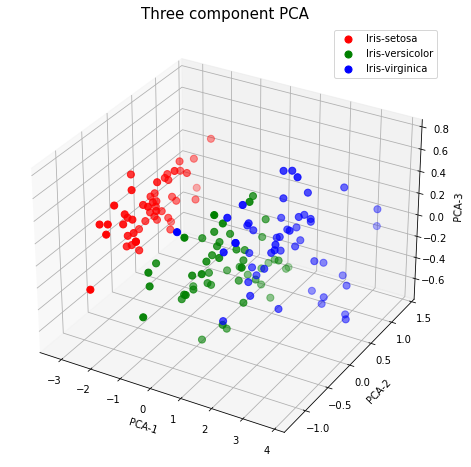

In [7]:
# Create the figure


fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('PCA-1', fontsize = 10)
ax.set_ylabel('PCA-2', fontsize = 10)
ax.set_zlabel('PCA-3', fontsize = 10)
ax.set_title('Three component PCA', fontsize = 15)

Targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for Target, color in zip(Targets,colors):
    indicesToKeep = finalDf['Target'] == Target
    ax.scatter(finalDf.loc[indicesToKeep, 'PCA-1']
               , finalDf.loc[indicesToKeep, 'PCA-2']
               , finalDf.loc[indicesToKeep, 'PCA-3']
               , c = color
               , s = 50)
ax.legend(Targets)
ax.grid()
plt.show()